In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sbs
import datetime
import pymc as pm
from datetime import timedelta
pd.options.display.max_columns = 50

## Get first generic futures prices

In [2]:
path = "C:/Users/pc/Desktop/SG_project/Data/generic_prices/"

files_to_read = [
'snp_futeres_price',
'vix_futeres_price',
'yen_futeres_price', 
'two_years_us_yield',
'five_years_us_yield',              
'ten_years_us_yield',
'euro_dollar_futeres_price',
'wheat_hrw_futeres_price',
'live_cattle_futeres_price',  
'feeder_cattle_futeres_price',   
'gold_futeres_price', 
'coffee_futeres_price', 
'nut_gas_ice_futeres_price',
'nut_gas_nymex_futeres_price', 
'crude_oil_ls_futeres_price',
'soybean_oil_futeres_price', 
'corn_futeres_price',
'frzn_orange_juice_futures_price', 
'sugar_futures_price', 
'copper_futures_price']

# read treasury futures separately because of the required conversion to decimal price (new column was created)
treasury_futures = ['two_tnote_futeres_price', 'five_tnote_futeres_price', 'ten_tnote_futeres_price', ]
# much shorted timeseries than other, will read separately
#read_separately = ['ten_ultra_tnote_futeres_price', 'prob_of_hike']

start = "2010-10-01"; end = "2018-04-25"
index = pd.bdate_range(start=start, end=end)
df = pd.DataFrame(index=index)
for file in files_to_read:
    data = pd.read_csv(path+file+".csv", parse_dates=True, index_col=[0])
    data = data.rename(columns={"Last Price": file})
    data[file] = pd.to_numeric(np.reshape(data.values,-1), errors="coerce")
    df = df.join(data, how='left') 
    
for file in treasury_futures:
    data = pd.read_csv(path+file+".csv", parse_dates=True, index_col=[0], usecols=[0,2])
    data = data.rename(columns={"Decimal Price": file})
    data[file] = pd.to_numeric(np.reshape(data.values,-1), errors="coerce")
    df = df.join(data, how='left')
df.head()

,snp_futeres_price,vix_futeres_price,yen_futeres_price,two_years_us_yield,five_years_us_yield,ten_years_us_yield,euro_dollar_futeres_price,wheat_hrw_futeres_price,live_cattle_futeres_price,feeder_cattle_futeres_price,gold_futeres_price,coffee_futeres_price,nut_gas_ice_futeres_price,nut_gas_nymex_futeres_price,crude_oil_ls_futeres_price,soybean_oil_futeres_price,corn_futeres_price,frzn_orange_juice_futures_price,sugar_futures_price,copper_futures_price,two_tnote_futeres_price,five_tnote_futeres_price,ten_tnote_futeres_price
2010-10-01,1142.25,24.75,120.07,0.4145,1.2565,2.5097,95.845,689.25,95.950,111.800,1316.1,181.10,46.76,3.797,81.58,43.49,465.75,155.65,23.36,369.05,109.757812,120.906250,126.078125
2010-10-04,1134.75,25.15,120.03,0.4066,1.2241,2.4758,95.890,683.00,95.100,110.500,1315.4,172.50,46.38,3.727,81.47,43.10,471.50,154.65,22.99,366.40,109.773438,121.093750,126.468750
2010-10-05,1154.75,23.65,120.28,0.3987,1.1917,2.4722,95.875,701.00,95.550,109.550,1338.9,177.00,47.12,3.743,82.82,43.47,491.00,158.50,23.74,372.65,109.773438,121.187500,126.640625
2010-10-06,1155.75,23.25,120.65,0.3829,1.1593,2.3976,95.925,697.50,94.850,109.200,1346.4,175.55,46.77,3.865,83.23,43.44,488.50,150.45,23.54,375.30,109.828125,121.359375,127.093750
2010-10-07,1156.50,22.95,121.52,0.3512,1.1270,2.3833,95.925,699.50,95.125,108.925,1333.9,173.45,46.54,3.617,81.67,43.79,498.25,151.20,25.16,367.95,109.882812,121.484375,127.140625


In [3]:
sg_cta = pd.read_csv("C:/Users/pc/Desktop/SG_project/Data/SG_Data/CTA_Historical.csv", parse_dates=True, \
                     header=None, index_col=[0], usecols=[0,1])
sg_cta = sg_cta.rename(columns={1:"SG_CTA"})
sg_cta.index.rename("Date", inplace=True)
sg_cta.head()

,SG_CTA
Date,
1999-12-31,1000.000000
2000-01-03,996.740000
2000-01-04,986.991882
2000-01-05,984.159216
2000-01-06,982.397571


In [4]:
df["SG_CTA"] = sg_cta
df.head()

,snp_futeres_price,vix_futeres_price,yen_futeres_price,two_years_us_yield,five_years_us_yield,ten_years_us_yield,euro_dollar_futeres_price,wheat_hrw_futeres_price,live_cattle_futeres_price,feeder_cattle_futeres_price,gold_futeres_price,coffee_futeres_price,nut_gas_ice_futeres_price,nut_gas_nymex_futeres_price,crude_oil_ls_futeres_price,soybean_oil_futeres_price,corn_futeres_price,frzn_orange_juice_futures_price,sugar_futures_price,copper_futures_price,two_tnote_futeres_price,five_tnote_futeres_price,ten_tnote_futeres_price,SG_CTA
2010-10-01,1142.25,24.75,120.07,0.4145,1.2565,2.5097,95.845,689.25,95.950,111.800,1316.1,181.10,46.76,3.797,81.58,43.49,465.75,155.65,23.36,369.05,109.757812,120.906250,126.078125,2010.976434
2010-10-04,1134.75,25.15,120.03,0.4066,1.2241,2.4758,95.890,683.00,95.100,110.500,1315.4,172.50,46.38,3.727,81.47,43.10,471.50,154.65,22.99,366.40,109.773438,121.093750,126.468750,2005.892686
2010-10-05,1154.75,23.65,120.28,0.3987,1.1917,2.4722,95.875,701.00,95.550,109.550,1338.9,177.00,47.12,3.743,82.82,43.47,491.00,158.50,23.74,372.65,109.773438,121.187500,126.640625,2030.601272
2010-10-06,1155.75,23.25,120.65,0.3829,1.1593,2.3976,95.925,697.50,94.850,109.200,1346.4,175.55,46.77,3.865,83.23,43.44,488.50,150.45,23.54,375.30,109.828125,121.359375,127.093750,2041.925935
2010-10-07,1156.50,22.95,121.52,0.3512,1.1270,2.3833,95.925,699.50,95.125,108.925,1333.9,173.45,46.54,3.617,81.67,43.79,498.25,151.20,25.16,367.95,109.882812,121.484375,127.140625,2042.460920


In [5]:
df.isnull().sum()

snp_futeres_price                  66
vix_futeres_price                  70
yen_futeres_price                  66
two_years_us_yield                 83
five_years_us_yield                83
ten_years_us_yield                 83
euro_dollar_futeres_price          66
wheat_hrw_futeres_price            68
live_cattle_futeres_price          68
feeder_cattle_futeres_price        67
gold_futeres_price                 68
coffee_futeres_price               69
nut_gas_ice_futeres_price          26
nut_gas_nymex_futeres_price        68
crude_oil_ls_futeres_price         68
soybean_oil_futeres_price          67
corn_futeres_price                 68
frzn_orange_juice_futures_price    68
sugar_futures_price                69
copper_futures_price               68
two_tnote_futeres_price            78
five_tnote_futeres_price           78
ten_tnote_futeres_price            95
SG_CTA                             14
dtype: int64

In [6]:
# fillna with the average of the nearest neighbors
df = df.where(df==np.nan, other=(df.fillna(method="ffill")+df.fillna(method="bfill"))/2)
df.isnull().sum()

snp_futeres_price                   0
vix_futeres_price                   0
yen_futeres_price                   0
two_years_us_yield                  0
five_years_us_yield                 0
ten_years_us_yield                  0
euro_dollar_futeres_price           0
wheat_hrw_futeres_price             0
live_cattle_futeres_price           0
feeder_cattle_futeres_price         0
gold_futeres_price                  0
coffee_futeres_price                0
nut_gas_ice_futeres_price           0
nut_gas_nymex_futeres_price         0
crude_oil_ls_futeres_price          0
soybean_oil_futeres_price           0
corn_futeres_price                  0
frzn_orange_juice_futures_price     0
sugar_futures_price                 0
copper_futures_price                0
two_tnote_futeres_price             0
five_tnote_futeres_price            0
ten_tnote_futeres_price             0
SG_CTA                             14
dtype: int64

In [7]:
import pickle
def save_obj(obj, name):
    with open('C:/Users/pc/Desktop/SG_project/Pickled/'+ name + '.pkl', 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)
save_obj(df, "df_generic1_prices")

In [8]:
df.head()

,snp_futeres_price,vix_futeres_price,yen_futeres_price,two_years_us_yield,five_years_us_yield,ten_years_us_yield,euro_dollar_futeres_price,wheat_hrw_futeres_price,live_cattle_futeres_price,feeder_cattle_futeres_price,gold_futeres_price,coffee_futeres_price,nut_gas_ice_futeres_price,nut_gas_nymex_futeres_price,crude_oil_ls_futeres_price,soybean_oil_futeres_price,corn_futeres_price,frzn_orange_juice_futures_price,sugar_futures_price,copper_futures_price,two_tnote_futeres_price,five_tnote_futeres_price,ten_tnote_futeres_price,SG_CTA
2010-10-01,1142.25,24.75,120.07,0.4145,1.2565,2.5097,95.845,689.25,95.950,111.800,1316.1,181.10,46.76,3.797,81.58,43.49,465.75,155.65,23.36,369.05,109.757812,120.906250,126.078125,2010.976434
2010-10-04,1134.75,25.15,120.03,0.4066,1.2241,2.4758,95.890,683.00,95.100,110.500,1315.4,172.50,46.38,3.727,81.47,43.10,471.50,154.65,22.99,366.40,109.773438,121.093750,126.468750,2005.892686
2010-10-05,1154.75,23.65,120.28,0.3987,1.1917,2.4722,95.875,701.00,95.550,109.550,1338.9,177.00,47.12,3.743,82.82,43.47,491.00,158.50,23.74,372.65,109.773438,121.187500,126.640625,2030.601272
2010-10-06,1155.75,23.25,120.65,0.3829,1.1593,2.3976,95.925,697.50,94.850,109.200,1346.4,175.55,46.77,3.865,83.23,43.44,488.50,150.45,23.54,375.30,109.828125,121.359375,127.093750,2041.925935
2010-10-07,1156.50,22.95,121.52,0.3512,1.1270,2.3833,95.925,699.50,95.125,108.925,1333.9,173.45,46.54,3.617,81.67,43.79,498.25,151.20,25.16,367.95,109.882812,121.484375,127.140625,2042.460920


In [9]:
df_diff = df-df.shift(1)
# align start and end with the cftc data index 
start1 = pd.to_datetime('2011-01-04 00:00:00'); end1 = pd.to_datetime('2018-04-03 00:00:00')
df_diff = df_diff[start1:end1]
save_obj(df_diff, "df_generic1_price_change")
df_diff.head()

,snp_futeres_price,vix_futeres_price,yen_futeres_price,two_years_us_yield,five_years_us_yield,ten_years_us_yield,euro_dollar_futeres_price,wheat_hrw_futeres_price,live_cattle_futeres_price,feeder_cattle_futeres_price,gold_futeres_price,coffee_futeres_price,nut_gas_ice_futeres_price,nut_gas_nymex_futeres_price,crude_oil_ls_futeres_price,soybean_oil_futeres_price,corn_futeres_price,frzn_orange_juice_futures_price,sugar_futures_price,copper_futures_price,two_tnote_futeres_price,five_tnote_futeres_price,ten_tnote_futeres_price,SG_CTA
2011-01-04,0.00,-0.20,-0.54,0.0238,0.0033,-0.0037,-0.025,-13.75,-0.800,-0.250,-44.1,-2.775,-2.75,0.019,-2.17,-0.76,-12.00,-2.75,-0.56,-8.85,-0.031250,0.031250,0.140625,-26.103704
2011-01-05,6.50,-0.40,-1.96,0.0874,0.1324,0.1367,-0.175,24.00,0.450,-0.025,-5.1,-1.950,-1.92,-0.196,0.92,0.92,10.75,4.40,1.20,3.90,-0.234375,-0.671875,-1.078125,-7.050444
2011-01-06,-1.50,-0.05,0.06,-0.0397,-0.0731,-0.0722,0.110,-14.75,0.100,0.950,-2.0,0.000,1.20,-0.039,-1.92,-0.35,-17.25,1.40,-1.96,-7.85,0.101562,0.320312,0.578125,-4.310415
2011-01-07,-2.75,0.05,0.35,-0.0717,-0.1059,-0.0695,0.090,-12.25,-0.350,-0.325,-2.8,-2.300,-1.44,-0.012,-0.35,-0.55,-7.00,5.25,1.29,-4.70,0.164062,0.656250,0.859375,-0.227358
2011-01-10,-2.00,-0.05,0.34,-0.0240,-0.0463,-0.0405,0.035,-4.75,0.575,0.700,5.2,0.550,-1.24,-0.023,1.22,0.31,12.00,-3.05,0.21,-1.80,0.054688,0.125000,0.203125,-3.586894


In [10]:
prob_of_hike = pd.read_csv(path+"prob_of_hike.csv", parse_dates=True, index_col=[0])
prob_of_hike = prob_of_hike.reindex(index=prob_of_hike.index[::-1])
prob_of_hike.head()

,Probability of Hike,Probability of No Change (1.5-1.75),Probability of Cut
Date,,,
2017-05-11,7.5,24.5,68.1
2017-05-12,3.9,19.1,77.0
2017-05-15,3.0,16.8,80.2
2017-05-16,3.0,16.8,80.2
2017-05-17,1.4,10.1,88.5


## Get prepared cftc data

In [11]:
def load_obj(name):
    with open('C:/Users/pc/Desktop/SG_project/Pickled/' + name + '.pkl', 'rb') as f:
        return pickle.load(f)
dictionary_commodities = load_obj("dictionary_commodities")
dictionary_financials = load_obj("dictionary_financials")

In [12]:
dictionary_commodities.keys()

dict_keys(['CORN - CHICAGO BOARD OF TRADE', 'OATS - CHICAGO BOARD OF TRADE', 'COTTON NO. 2 - ICE FUTURES U.S.', 'ROUGH RICE - CHICAGO BOARD OF TRADE', 'LEAN HOGS - CHICAGO MERCANTILE EXCHANGE', 'LIVE CATTLE - CHICAGO MERCANTILE EXCHANGE', 'FEEDER CATTLE - CHICAGO MERCANTILE EXCHANGE', 'SOYBEANS - CHICAGO BOARD OF TRADE', 'SOYBEAN OIL - CHICAGO BOARD OF TRADE', 'SOYBEAN MEAL - CHICAGO BOARD OF TRADE', 'COCOA - ICE FUTURES U.S.', 'SUGAR NO. 11 - ICE FUTURES U.S.', 'COFFEE C - ICE FUTURES U.S.', 'CRUDE OIL, LIGHT SWEET - NEW YORK MERCANTILE EXCHANGE', 'GOLD - COMMODITY EXCHANGE INC.', 'NATURAL GAS - NEW YORK MERCANTILE EXCHANGE', 'NATURAL GAS ICE HENRY HUB - ICE FUTURES ENERGY DIV', 'COPPER-GRADE #1 - COMMODITY EXCHANGE INC.', 'FRZN CONCENTRATED ORANGE JUICE - ICE FUTURES U.S.'])

In [13]:
dictionary_financials.keys()

dict_keys(['E-MINI S&P 500 STOCK INDEX - CHICAGO MERCANTILE EXCHANGE', 'VIX FUTURES - CBOE FUTURES EXCHANGE', 'EURO FX - CHICAGO MERCANTILE EXCHANGE', '3-MONTH EURODOLLARS - CHICAGO MERCANTILE EXCHANGE', 'BRITISH POUND STERLING - CHICAGO MERCANTILE EXCHANGE', 'JAPANESE YEN - CHICAGO MERCANTILE EXCHANGE', '2-YEAR U.S. TREASURY NOTES - CHICAGO BOARD OF TRADE', '10-YEAR U.S. TREASURY NOTES - CHICAGO BOARD OF TRADE', '5-YEAR U.S. TREASURY NOTES - CHICAGO BOARD OF TRADE', 'CANADIAN DOLLAR - CHICAGO MERCANTILE EXCHANGE'])

In [14]:
dictionary_commodities['SOYBEANS - CHICAGO BOARD OF TRADE'].columns

Index(['Market_and_Exchange_Names', 'CFTC_Contract_Market_Code',
       'CFTC_Market_Code', 'CFTC_Commodity_Code', 'Open_Interest_All',
       'Prod_Merc_Positions_Long_ALL', 'Prod_Merc_Positions_Short_ALL',
       'Swap_Positions_Long_All', 'Swap__Positions_Short_All',
       'Swap__Positions_Spread_All', 'M_Money_Positions_Long_ALL',
       'M_Money_Positions_Short_ALL', 'M_Money_Positions_Spread_ALL',
       'Tot_Rept_Positions_Long_All', 'Tot_Rept_Positions_Short_All',
       'Change_in_Open_Interest_All', 'Change_in_M_Money_Long_All',
       'Change_in_M_Money_Short_All', 'Change_in_M_Money_Spread_All',
       'Pct_of_OI_M_Money_Long_All', 'Pct_of_OI_M_Money_Short_All',
       'Pct_of_OI_M_Money_Spread_All', 'Traders_Prod_Merc_Long_All',
       'Traders_Prod_Merc_Short_All', 'Traders_Swap_Long_All',
       'Traders_Swap_Short_All', 'Traders_Swap_Spread_All',
       'Traders_M_Money_Long_All', 'Traders_M_Money_Short_All',
       'Traders_M_Money_Spread_All', 'Traders_Other_Rept_Lon

In [15]:
save_obj(dictionary_financials['E-MINI S&P 500 STOCK INDEX - CHICAGO MERCANTILE EXCHANGE'].index, "cftc_index")

In [16]:
dictionary_financials['E-MINI S&P 500 STOCK INDEX - CHICAGO MERCANTILE EXCHANGE'].columns

Index(['Market_and_Exchange_Names', 'CFTC_Contract_Market_Code',
       'CFTC_Market_Code', 'CFTC_Commodity_Code', 'Open_Interest_All',
       'Dealer_Positions_Long_All', 'Dealer_Positions_Short_All',
       'Dealer_Positions_Spread_All', 'Asset_Mgr_Positions_Long_All',
       'Asset_Mgr_Positions_Short_All', 'Asset_Mgr_Positions_Spread_All',
       'Lev_Money_Positions_Long_All', 'Lev_Money_Positions_Short_All',
       'Lev_Money_Positions_Spread_All', 'Tot_Rept_Positions_Long_All',
       'Tot_Rept_Positions_Short_All', 'Change_in_Open_Interest_All',
       'Change_in_Dealer_Long_All', 'Change_in_Dealer_Short_All',
       'Change_in_Dealer_Spread_All', 'Change_in_Asset_Mgr_Long_All',
       'Change_in_Asset_Mgr_Short_All', 'Change_in_Asset_Mgr_Spread_All',
       'Change_in_Lev_Money_Long_All', 'Change_in_Lev_Money_Short_All',
       'Change_in_Lev_Money_Spread_All', 'Change_in_Tot_Rept_Long_All',
       'Change_in_Tot_Rept_Short_All', 'Pct_of_Open_Interest_All',
       'Pct_of_OI_D

In [17]:
def set_cftc_index(df, fill_method):
    use_index = load_obj("cftc_index")
    df = df.reindex(pd.date_range(use_index[0],use_index[-1], freq='D'))
    #df = df.asfreq("D")
    if fill_method == "ffill":
        df.fillna(method="ffill", inplace=True)
        # fill the remaining
        df.fillna(method="bfill", inplace=True)
    elif fill_method == "bfill":
        df.fillna(method="bfill", inplace=True)
        # fill the remaining
        df.fillna(method="ffill", inplace=True)
    elif fill_method == "avg":
        df = df.where(df==np.nan, other=(df.fillna(method="ffill")+df.fillna(method="bfill"))/2)
        # fill the remaining
        df.fillna(method="ffill", inplace=True)
        df.fillna(method="bfill", inplace=True)
    
    df = df.reindex(use_index)    
    return pd.DataFrame(df)

In [18]:
df_diff = set_cftc_index(df_diff, "avg")

In [19]:
df_diff.head()

,snp_futeres_price,vix_futeres_price,yen_futeres_price,two_years_us_yield,five_years_us_yield,ten_years_us_yield,euro_dollar_futeres_price,wheat_hrw_futeres_price,live_cattle_futeres_price,feeder_cattle_futeres_price,gold_futeres_price,coffee_futeres_price,nut_gas_ice_futeres_price,nut_gas_nymex_futeres_price,crude_oil_ls_futeres_price,soybean_oil_futeres_price,corn_futeres_price,frzn_orange_juice_futures_price,sugar_futures_price,copper_futures_price,two_tnote_futeres_price,five_tnote_futeres_price,ten_tnote_futeres_price,SG_CTA
,,,,,,,,,,,,,,,,,,,,,,,,
2011-01-04,0.000,-0.200,-0.540,0.0238,0.00330,-0.0037,-0.0250,-13.75,-0.8000,-0.250,-44.10,-2.775,-2.75,0.0190,-2.17,-0.760,-12.000,-2.750,-0.560,-8.85,-0.031250,0.031250,0.140625,-26.103704
2011-01-11,5.000,-0.700,-0.650,0.0159,0.04940,0.0564,-0.0750,-3.50,1.5000,1.150,10.20,3.450,0.55,0.0820,1.86,-0.490,0.000,-6.600,1.010,8.45,-0.015625,-0.164062,-0.328125,0.418870
2011-01-18,2.625,-0.175,0.315,0.0080,0.01645,0.0216,-0.0375,8.25,-0.0875,0.850,3.85,0.375,-0.10,-0.0275,-0.08,0.425,5.375,1.175,0.115,0.80,0.000000,-0.257812,-0.132812,7.632696
2011-01-25,-1.000,-0.200,0.500,-0.0490,-0.07000,-0.0760,0.0900,9.50,-0.5250,-0.375,-12.20,-6.050,-0.37,-0.1070,-1.68,-1.400,-11.250,-0.150,-0.470,-12.25,0.085938,0.375000,0.687500,-5.264925
2011-02-01,20.250,-1.150,0.890,0.0393,0.07250,0.0690,-0.0800,-0.75,0.0500,-0.525,5.80,4.600,0.42,-0.0730,-1.42,0.840,6.500,1.000,-0.010,8.85,-0.093750,-0.343750,-0.500000,28.110258


In [20]:
df_diff.columns

Index(['snp_futeres_price', 'vix_futeres_price', 'yen_futeres_price',
       'two_years_us_yield', 'five_years_us_yield', 'ten_years_us_yield',
       'euro_dollar_futeres_price', 'wheat_hrw_futeres_price',
       'live_cattle_futeres_price', 'feeder_cattle_futeres_price',
       'gold_futeres_price', 'coffee_futeres_price',
       'nut_gas_ice_futeres_price', 'nut_gas_nymex_futeres_price',
       'crude_oil_ls_futeres_price', 'soybean_oil_futeres_price',
       'corn_futeres_price', 'frzn_orange_juice_futures_price',
       'sugar_futures_price', 'copper_futures_price',
       'two_tnote_futeres_price', 'five_tnote_futeres_price',
       'ten_tnote_futeres_price', 'SG_CTA'],
      dtype='object')

In [21]:
snp_index = pd.read_csv("C:/Users/pc/Desktop/SG_project/Data/^GSPC.csv", parse_dates=True, index_col=[0], usecols=[0,5])
snp_index = snp_index.rename(columns={"Adj Close":"S&P_index"})

In [22]:
vix_index = pd.read_csv("C:/Users/pc/Desktop/SG_project/Data/^VIX.csv", parse_dates=True, index_col=[0], usecols=[0,5])
vix_index = vix_index.rename(columns={"Adj Close":"VIX_index"})

In [23]:
fed_funds_rate =pd.read_csv("C:/Users/pc/Desktop/SG_project/Data/FEDFUNDS.csv", index_col=[0], parse_dates=True)
fed_funds_rate_diff = fed_funds_rate - fed_funds_rate.shift(1)
fed_funds_rate.loc["2011-01-04":].head()

,FEDFUNDS
DATE,
2011-02-01,0.16
2011-03-01,0.14
2011-04-01,0.10
2011-05-01,0.09
2011-06-01,0.09


In [24]:
snp_index_diff = set_cftc_index(snp_index-snp_index.shift(), "avg")
snp_index = set_cftc_index(snp_index, "avg")
vix_index_diff = set_cftc_index(vix_index-vix_index.shift(), "avg")
vix_index = set_cftc_index(vix_index, "avg")

In [25]:
# vix_index.isnull().unstack()[vix_index.isnull().unstack()]
fed_funds_rate_diff = set_cftc_index(fed_funds_rate_diff, 'avg')
fed_funds_rate = set_cftc_index(fed_funds_rate, "avg")

In [26]:
unempl_rate =pd.read_csv("C:/Users/pc/Desktop/SG_project/Data/UNRATE.csv", index_col=[0], parse_dates=True)
unempl_rate_diff = unempl_rate - unempl_rate.shift(1)
unempl_rate.loc["2011-01-04":].head()

,UNRATE
DATE,
2011-02-01,9.0
2011-03-01,9.0
2011-04-01,9.1
2011-05-01,9.0
2011-06-01,9.1


In [27]:
unempl_rate_diff = set_cftc_index(unempl_rate_diff, 'avg')
unempl_rate = set_cftc_index(unempl_rate, "avg")

In [28]:
df = set_cftc_index(df, "avg")
df.head()

,snp_futeres_price,vix_futeres_price,yen_futeres_price,two_years_us_yield,five_years_us_yield,ten_years_us_yield,euro_dollar_futeres_price,wheat_hrw_futeres_price,live_cattle_futeres_price,feeder_cattle_futeres_price,gold_futeres_price,coffee_futeres_price,nut_gas_ice_futeres_price,nut_gas_nymex_futeres_price,crude_oil_ls_futeres_price,soybean_oil_futeres_price,corn_futeres_price,frzn_orange_juice_futures_price,sugar_futures_price,copper_futures_price,two_tnote_futeres_price,five_tnote_futeres_price,ten_tnote_futeres_price,SG_CTA
,,,,,,,,,,,,,,,,,,,,,,,,
2011-01-04,1265.25,19.10,122.06,0.6171,2.0059,3.3287,94.815,849.25,106.175,121.000,1378.8,234.95,58.32,4.669,89.38,56.33,608.5,177.55,31.00,436.9,109.398438,117.687500,120.312500,2053.398424
2011-01-11,1270.50,17.95,120.20,0.5850,1.9624,3.3396,94.800,838.00,108.450,123.450,1384.3,234.70,55.47,4.481,91.11,56.17,607.0,178.95,32.75,434.9,109.468750,117.953125,120.546875,2038.642183
2011-01-18,1294.75,15.90,121.17,0.5845,1.9517,3.3663,94.735,876.50,109.200,127.300,1368.2,235.35,55.66,4.425,91.38,57.55,659.5,175.40,31.12,442.8,109.492188,118.101562,120.593750,2052.215875
2011-01-25,1287.50,18.20,121.74,0.5760,1.9378,3.3284,94.795,917.50,106.250,125.975,1332.3,231.25,54.69,4.473,86.19,55.78,644.0,170.65,31.84,422.6,109.507812,118.242188,120.921875,2037.222829
2011-02-01,1302.75,17.95,122.85,0.6013,2.0132,3.4394,94.570,924.00,109.000,127.475,1339.6,249.40,53.08,4.347,90.77,58.72,666.0,169.55,33.96,454.7,109.500000,118.070312,120.296875,2073.871668


In [29]:
def get_corr(df, threshold):
    # get entries with correlation > threshold or corr < threshold
    # create a dictionary; keys = string; values = list

    corr_mat_df = df.corr()[(abs(df.corr()) >= threshold)].replace([0, 1], np.nan)
#     corr_mat_df = pd.DataFrame(np.tril(corr_mat_df), index=corr_mat_df.index, 
#                                columns=corr_mat_df.columns).replace([0, 1], np.nan)
    corr_dict = {}
    for index in corr_mat_df.index:
        for column in corr_mat_df.columns:
            if not np.isnan(corr_mat_df.loc[index][column]):
                # add list to the key, if key does not exist
                if str(index) not in corr_dict.keys():
                    corr_dict[str(index)] = [column]
                # if key exists, append to the lsit
                else:
                    corr_dict[str(index)].append(column)
    return corr_dict

In [30]:
corr_dict_df_diff = get_corr(df_diff, .7)
corr_dict_df_diff

{'snp_futeres_price': ['vix_futeres_price'],
 'vix_futeres_price': ['snp_futeres_price'],
 'two_years_us_yield': ['five_years_us_yield',
  'ten_years_us_yield',
  'two_tnote_futeres_price',
  'five_tnote_futeres_price',
  'ten_tnote_futeres_price'],
 'five_years_us_yield': ['two_years_us_yield',
  'ten_years_us_yield',
  'euro_dollar_futeres_price',
  'two_tnote_futeres_price',
  'five_tnote_futeres_price',
  'ten_tnote_futeres_price'],
 'ten_years_us_yield': ['two_years_us_yield',
  'five_years_us_yield',
  'euro_dollar_futeres_price',
  'five_tnote_futeres_price',
  'ten_tnote_futeres_price'],
 'euro_dollar_futeres_price': ['five_years_us_yield',
  'ten_years_us_yield',
  'five_tnote_futeres_price',
  'ten_tnote_futeres_price'],
 'two_tnote_futeres_price': ['two_years_us_yield',
  'five_years_us_yield',
  'five_tnote_futeres_price'],
 'five_tnote_futeres_price': ['two_years_us_yield',
  'five_years_us_yield',
  'ten_years_us_yield',
  'euro_dollar_futeres_price',
  'two_tnote_futeres

In [31]:
df_change_net_positions = load_obj("df_change_net_positions")
df_net_positions = load_obj("df_net_positions")

In [32]:
corr_dict_pos_change = get_corr(df_change_net_positions, .5)
corr_dict_pos_change

{'VIX FUTURES - CBOE FUTURES EXCHANGE_AM': ['VIX FUTURES - CBOE FUTURES EXCHANGE_LM'],
 'VIX FUTURES - CBOE FUTURES EXCHANGE_LM': ['VIX FUTURES - CBOE FUTURES EXCHANGE_AM'],
 '2-YEAR U.S. TREASURY NOTES - CHICAGO BOARD OF TRADE_AM': ['2-YEAR U.S. TREASURY NOTES - CHICAGO BOARD OF TRADE_LM'],
 '2-YEAR U.S. TREASURY NOTES - CHICAGO BOARD OF TRADE_LM': ['2-YEAR U.S. TREASURY NOTES - CHICAGO BOARD OF TRADE_AM'],
 '10-YEAR U.S. TREASURY NOTES - CHICAGO BOARD OF TRADE_AM': ['10-YEAR U.S. TREASURY NOTES - CHICAGO BOARD OF TRADE_LM'],
 '10-YEAR U.S. TREASURY NOTES - CHICAGO BOARD OF TRADE_LM': ['10-YEAR U.S. TREASURY NOTES - CHICAGO BOARD OF TRADE_AM'],
 '5-YEAR U.S. TREASURY NOTES - CHICAGO BOARD OF TRADE_AM': ['5-YEAR U.S. TREASURY NOTES - CHICAGO BOARD OF TRADE_LM'],
 '5-YEAR U.S. TREASURY NOTES - CHICAGO BOARD OF TRADE_LM': ['5-YEAR U.S. TREASURY NOTES - CHICAGO BOARD OF TRADE_AM'],
 'LIVE CATTLE - CHICAGO MERCANTILE EXCHANGE_MM': ['FEEDER CATTLE - CHICAGO MERCANTILE EXCHANGE_MM'],
 'FEEDE

In [33]:
corr_dict_pos = get_corr(df_net_positions, .7)
corr_dict_pos

{'E-MINI S&P 500 STOCK INDEX - CHICAGO MERCANTILE EXCHANGE_AM': ['BRITISH POUND STERLING - CHICAGO MERCANTILE EXCHANGE_AM'],
 'EURO FX - CHICAGO MERCANTILE EXCHANGE_AM': ['3-MONTH EURODOLLARS - CHICAGO MERCANTILE EXCHANGE_LM',
  '2-YEAR U.S. TREASURY NOTES - CHICAGO BOARD OF TRADE_AM'],
 '3-MONTH EURODOLLARS - CHICAGO MERCANTILE EXCHANGE_AM': ['5-YEAR U.S. TREASURY NOTES - CHICAGO BOARD OF TRADE_AM',
  '5-YEAR U.S. TREASURY NOTES - CHICAGO BOARD OF TRADE_LM'],
 '3-MONTH EURODOLLARS - CHICAGO MERCANTILE EXCHANGE_LM': ['EURO FX - CHICAGO MERCANTILE EXCHANGE_AM'],
 'BRITISH POUND STERLING - CHICAGO MERCANTILE EXCHANGE_AM': ['E-MINI S&P 500 STOCK INDEX - CHICAGO MERCANTILE EXCHANGE_AM'],
 'JAPANESE YEN - CHICAGO MERCANTILE EXCHANGE_AM': ['5-YEAR U.S. TREASURY NOTES - CHICAGO BOARD OF TRADE_AM'],
 '2-YEAR U.S. TREASURY NOTES - CHICAGO BOARD OF TRADE_AM': ['EURO FX - CHICAGO MERCANTILE EXCHANGE_AM'],
 '10-YEAR U.S. TREASURY NOTES - CHICAGO BOARD OF TRADE_AM': ['10-YEAR U.S. TREASURY NOTES - 

In [34]:
oil_supply = load_obj("df_oil_supply")
oil_supply = oil_supply.loc["2011":]
oil_supply

,USA,G20,WLD
TIME,,,
2011,288542.025,2043525.990,3716585.643
2012,330942.310,2115145.846,3779607.829
2013,379905.934,2154105.673,3790678.472
2014,443927.420,2246619.325,3857213.914
2015,473966.275,2316253.847,3950839.055
2016,447982.504,2302742.040,3949673.871


In [35]:
energy_index = pd.read_csv("C:/Users/pc/Desktop/SG_project/Data/"+"VDE.csv", 
                           index_col=0, parse_dates=True, usecols=[0, 5])
energy_index = energy_index.rename(columns={"Adj Close":"VDE"})
energy_index.head()

,VDE
Date,
2004-09-29,39.159470
2004-09-30,39.512112
2004-10-01,40.021481
2004-10-04,40.060669
2004-10-05,40.428989


In [36]:
df_oil_fut_annual = pd.DataFrame(index=oil_supply.index, columns=[['Long', 'Short', 'Fut Price', 'Energy Index']])
for i in oil_supply.index:
    df_oil_fut_annual.loc[i]['Long'] = dictionary_commodities["CRUDE OIL, LIGHT SWEET - NEW YORK MERCANTILE EXCHANGE"]\
    ["M_Money_Positions_Long_ALL"].loc[str(i)].mean()
    df_oil_fut_annual.loc[i]['Short'] = dictionary_commodities["CRUDE OIL, LIGHT SWEET - NEW YORK MERCANTILE EXCHANGE"]\
    ["M_Money_Positions_Short_ALL"].loc[str(i)].mean()
    df_oil_fut_annual.loc[i]['Fut Price'] = df['crude_oil_ls_futeres_price'].loc[str(i)].mean()
    df_oil_fut_annual.loc[i]['Energy Index'] = energy_index.loc[str(i)].mean()
    
df_oil_fut_annual = df_oil_fut_annual.astype('float64')
df_oil_fut_annual

,Long,Short,Fut Price,Energy Index
TIME,,,,
2011,241514.750000,52908.096154,95.390385,89.018729
2012,204018.641509,57886.754717,94.312453,88.430747
2013,259120.826923,41185.153846,98.025769,102.220549
2014,306135.807692,49464.365385,92.614231,115.680086
2015,285543.365385,117802.211538,48.833654,93.283349
2016,295507.346154,128813.307692,43.225000,87.304715


In [37]:
oil_df = pd.concat([oil_supply, df_oil_fut_annual], axis=1)
oil_df

,USA,G20,WLD,Long,Short,Fut Price,Energy Index
TIME,,,,,,,
2011,288542.025,2043525.990,3716585.643,241514.750000,52908.096154,95.390385,89.018729
2012,330942.310,2115145.846,3779607.829,204018.641509,57886.754717,94.312453,88.430747
2013,379905.934,2154105.673,3790678.472,259120.826923,41185.153846,98.025769,102.220549
2014,443927.420,2246619.325,3857213.914,306135.807692,49464.365385,92.614231,115.680086
2015,473966.275,2316253.847,3950839.055,285543.365385,117802.211538,48.833654,93.283349
2016,447982.504,2302742.040,3949673.871,295507.346154,128813.307692,43.225000,87.304715


In [38]:
corr_dict_oil = get_corr(oil_df, .5)
corr_dict_oil

{'USA': ['G20', 'WLD', 'Long', 'Short', 'Fut Price'],
 'G20': ['USA', 'WLD', 'Long', 'Short', 'Fut Price'],
 'WLD': ['USA', 'G20', 'Long', 'Short', 'Fut Price'],
 'Long': ['USA', 'G20', 'WLD', 'Fut Price', 'Energy Index'],
 'Short': ['USA', 'G20', 'WLD', 'Fut Price'],
 'Fut Price': ['USA', 'G20', 'WLD', 'Long', 'Short'],
 'Energy Index': ['Long']}

In [39]:
# US Dollars to one Euro  
doll2euro = pd.read_csv("C:/Users/pc/Desktop/SG_project/Data/"+"DEXUSEU_doll_euro.csv", index_col=[0], parse_dates=True)
doll2euro = doll2euro.rename(columns={"DEXUSEU":"US/EuroFX"})
doll2euro = pd.to_numeric(doll2euro['US/EuroFX'], errors="coerce")
doll2euro_diff = doll2euro - doll2euro.shift(1)
doll2euro.loc["2011"].head()

DATE
2011-01-03    1.3371
2011-01-04    1.3306
2011-01-05    1.3171
2011-01-06    1.3027
2011-01-07    1.2944
Name: US/EuroFX, dtype: float64

In [40]:
doll2euro_diff = set_cftc_index(doll2euro_diff, 'avg')
doll2euro = set_cftc_index(doll2euro, 'avg')

In [41]:
inflation_exp = pd.read_csv("C:/Users/pc/Desktop/SG_project/Data/"+"T10YIE_inflation.csv", index_col=[0], parse_dates=True)
inflation_exp = inflation_exp.rename(columns={"T10YIE":"Inflation"})
inflation_exp = pd.to_numeric(inflation_exp['Inflation'], errors="coerce")
inflation_exp_diff = inflation_exp - inflation_exp.shift(1)
inflation_exp.loc["2011":].head()

DATE
2011-01-03    2.31
2011-01-04    2.35
2011-01-05    2.42
2011-01-06    2.41
2011-01-07    2.36
Name: Inflation, dtype: float64

In [42]:
inflation_exp_diff = set_cftc_index(inflation_exp_diff, 'avg')
inflation_exp = set_cftc_index(inflation_exp, 'avg')
inflation_exp.head()

,Inflation
,
2011-01-04,2.35
2011-01-11,2.40
2011-01-18,2.40
2011-01-25,2.24
2011-02-01,2.37


In [43]:
def mult_lin_reg(y, *args, x_label='', y_label='', title=''):
    # for each x_i provide a lag
    # (Series,       Series1, 0, Series2, 0, Series, 1)
    import matplotlib as mpl
    import statsmodels.api as sm
    from scipy.stats.stats import pearsonr
    import matplotlib.pyplot as plt
    import numpy as np
    %matplotlib inline
    
    joined = pd.DataFrame(y)
    for_pred = np.ones(int(len(args)/2)+1); k = 1
    
    for i in range(len(args)):
        if i % 2 == 0:
            if args[i+1] != 0:
                joined = joined.join(pd.DataFrame(args[i].shift(-args[i+1])), how='outer')
                for_pred[k] = args[i].iloc[-args[i+1]]
                k += 1
            else:
                joined = joined.join(pd.DataFrame(args[i]), how='outer')
                for_pred[k] = args[i].iloc[-args[i+1]]
                k += 1

    joined = joined.dropna(0)
    y = joined[joined.columns[0]].values 
    x = joined[joined.columns[1:]].values
    X = sm.add_constant(x)
    # if only one independent variable -- make a plot 
    if len(args) == 2:
        plt_dates = mpl.dates.date2num(joined.index.to_pydatetime())
        
        plt.rc('figure',figsize=(16,8))
        model = sm.OLS(y, X).fit()

        if for_pred[1] != 1:
            print(for_pred)
            print(model.predict(for_pred))
        print(model.summary())
        # check for multi-collinearity using eigen values 
        w, v = np.linalg.eig(joined.corr())
        print("Eigen Values: ", w)
        corr = pearsonr(x.flatten(), y.flatten())
        print("Correlation = ", corr[0])
        print("\n***********************************************************************************************\n")
        plt.plot(x, model.fittedvalues, color='orange', lw=.85)
        
        # last 50 data points correspond roughly to a year   
        model = sm.OLS(y[-50:], X[-50:]).fit()
        if for_pred[1] != 1:
            print(model.predict(for_pred))
        print(model.summary())
        corr = pearsonr(x.flatten()[-50:], y.flatten()[-50:])
        w, v = np.linalg.eig(joined.iloc[-50:].corr())
        print("Eigen Values: ", w)
        print("Correlation = ", corr[0])
        
        if model.params[1] > 0:
            reg_lin_eq = "y="+str(round(model.params[0], 2))+"+"+str(round(model.params[1], 2))+"x"
        else:
            reg_lin_eq = "y="+str(round(model.params[0], 2))+str(round(model.params[1], 2))+"x"
        plt.plot(x[-50:], model.fittedvalues, color='red', lw=.85, label=reg_lin_eq) 
        leg = plt.legend(loc='best', fontsize=11.5)
        leg.get_lines()[0].set_linewidth(3.0)
        

        plt.title(title, fontsize=15)
        plt.xlabel(x_label, fontsize=15)
        plt.ylabel(y_label, fontsize=15)
        
        # set the size of the dots proportional ot the FEDFUNDS
        cm = plt.cm.get_cmap('viridis')
        plt.scatter(x, y, c=plt_dates, s=fed_funds_rate*40,  cmap=cm)
        plt.colorbar(ticks=mpl.dates.YearLocator(1, month=6), format=mpl.dates.DateFormatter('%d %b %y'))
        
        plt.savefig("C:/Users/pc/Desktop/SG_project/Data/plots/"+x_label+"_VS_"+y_label+title+".png"
                    , bbox_inches='tight', dpi=150)
    else:
        print(for_pred)
        model = sm.OLS(y, X).fit()
        # predict one step ahead 
        print(model.predict(for_pred))
        print(model.summary())
        w, v = np.linalg.eig(joined.corr())
        print("Eigen Values: ", w)
        print("\n***********************************************************************************************\n")
        model = sm.OLS(y[-50:], X[-50:]).fit()
        print(model.predict(for_pred))
        print(model.summary())
        # check for multi-collinearity using eigen values 
        w, v = np.linalg.eig(joined.iloc[-50:].corr())
        print("Eigen Values: ", w)

        return joined.corr()     

c:\users\pc\appdata\local\programs\python\python36-32\lib\site-packages\statsmodels-0.8.0-py3.6-win32.egg\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


[ 1.      3.3287]
[ 103309.55312856]
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.012
Method:                 Least Squares   F-statistic:                     5.567
Date:                Tue, 08 May 2018   Prob (F-statistic):             0.0188
Time:                        00:40:23   Log-Likelihood:                -5256.7
No. Observations:                 379   AIC:                         1.052e+04
Df Residuals:                     377   BIC:                         1.053e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.1

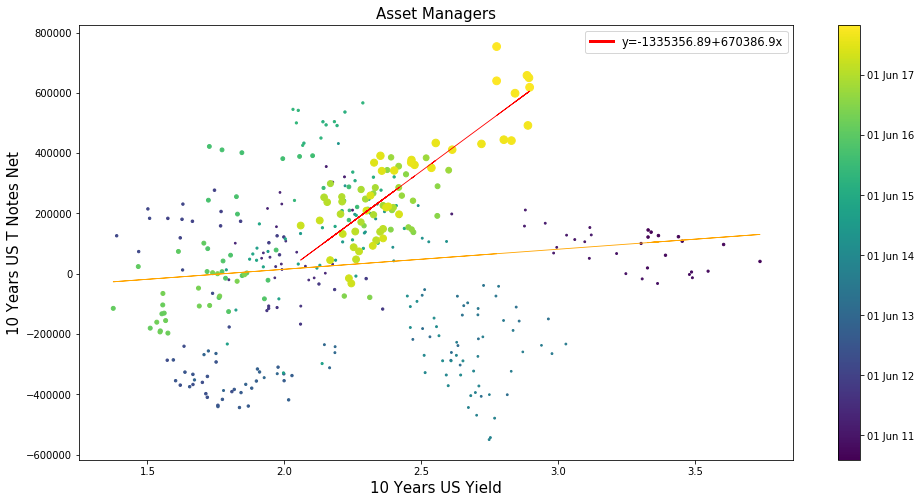

In [44]:
mult_lin_reg(dictionary_financials["10-YEAR U.S. TREASURY NOTES - CHICAGO BOARD OF TRADE"]\
             ["Net_Positioning_Asset_Mgr"], df['ten_years_us_yield'], 0, x_label="10 Years US Yield", 
            y_label="10 Years US T Notes Net", title='Asset Managers') 

[ 1.      3.3287]
[ 54963.94692561]
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.2510
Date:                Tue, 08 May 2018   Prob (F-statistic):              0.617
Time:                        00:40:25   Log-Likelihood:                -5285.0
No. Observations:                 379   AIC:                         1.057e+04
Df Residuals:                     377   BIC:                         1.058e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4302

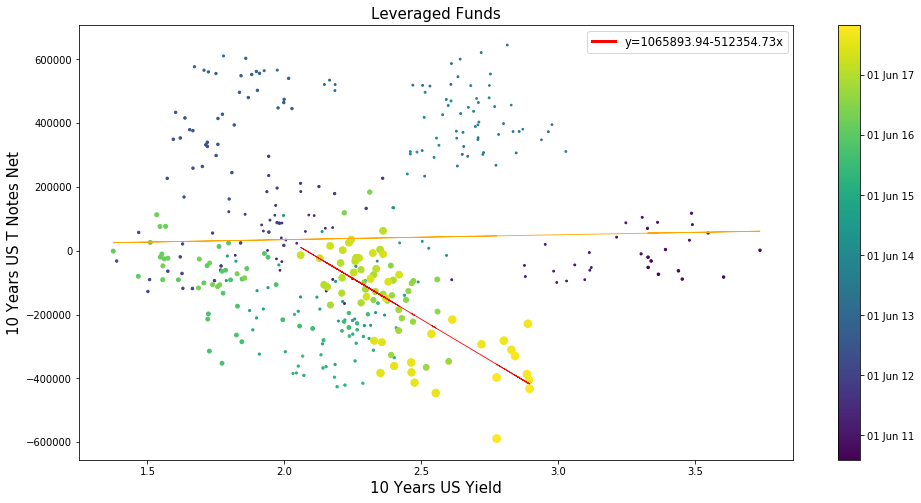

In [45]:
mult_lin_reg(dictionary_financials["10-YEAR U.S. TREASURY NOTES - CHICAGO BOARD OF TRADE"]\
             ["Net_Positioning_Lev_Money"], df['ten_years_us_yield'], 0, x_label="10 Years US Yield", 
            y_label="10 Years US T Notes Net", title='Leveraged Funds') 

[ 1.   -0.76]
[-1945.42148127]
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     3.411
Date:                Tue, 08 May 2018   Prob (F-statistic):             0.0655
Time:                        00:40:26   Log-Likelihood:                -4090.4
No. Observations:                 379   AIC:                             8185.
Df Residuals:                     377   BIC:                             8193.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -192.0014

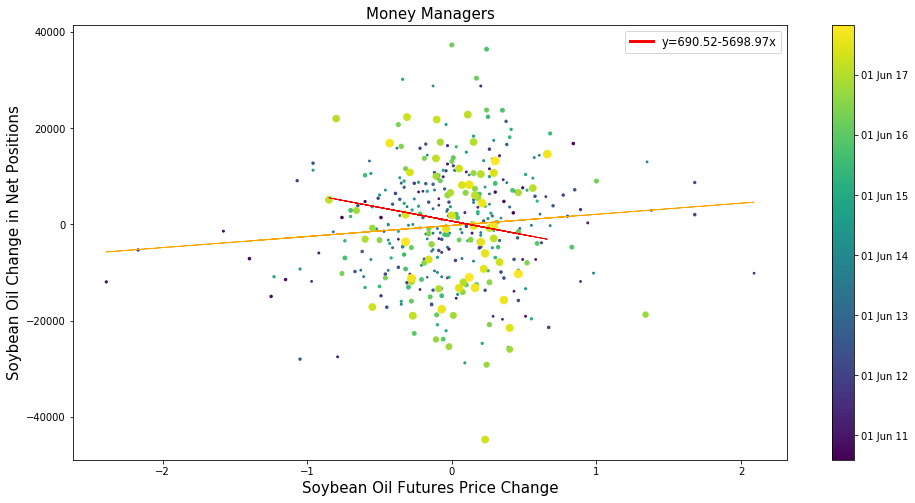

In [46]:
mult_lin_reg(dictionary_commodities["SOYBEAN OIL - CHICAGO BOARD OF TRADE"]["Change_in_Net_Positioning_MM"], 
            df_diff["soybean_oil_futeres_price"], 0, x_label='Soybean Oil Futures Price Change', 
            y_label='Soybean Oil Change in Net Positions', title='Money Managers')

In [47]:
dictionary_commodities.keys()

dict_keys(['CORN - CHICAGO BOARD OF TRADE', 'OATS - CHICAGO BOARD OF TRADE', 'COTTON NO. 2 - ICE FUTURES U.S.', 'ROUGH RICE - CHICAGO BOARD OF TRADE', 'LEAN HOGS - CHICAGO MERCANTILE EXCHANGE', 'LIVE CATTLE - CHICAGO MERCANTILE EXCHANGE', 'FEEDER CATTLE - CHICAGO MERCANTILE EXCHANGE', 'SOYBEANS - CHICAGO BOARD OF TRADE', 'SOYBEAN OIL - CHICAGO BOARD OF TRADE', 'SOYBEAN MEAL - CHICAGO BOARD OF TRADE', 'COCOA - ICE FUTURES U.S.', 'SUGAR NO. 11 - ICE FUTURES U.S.', 'COFFEE C - ICE FUTURES U.S.', 'CRUDE OIL, LIGHT SWEET - NEW YORK MERCANTILE EXCHANGE', 'GOLD - COMMODITY EXCHANGE INC.', 'NATURAL GAS - NEW YORK MERCANTILE EXCHANGE', 'NATURAL GAS ICE HENRY HUB - ICE FUTURES ENERGY DIV', 'COPPER-GRADE #1 - COMMODITY EXCHANGE INC.', 'FRZN CONCENTRATED ORANGE JUICE - ICE FUTURES U.S.'])

In [48]:
mult_lin_reg(dictionary_financials["E-MINI S&P 500 STOCK INDEX - CHICAGO MERCANTILE EXCHANGE"]\
             ["Net_Positioning_Asset_Mgr"], fed_funds_rate, 4, unempl_rate, 4, inflation_exp, 1) 
# 560221

[ 1.    1.51  4.1   2.08]
[ 824727.02702507]
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.499
Model:                            OLS   Adj. R-squared:                  0.495
Method:                 Least Squares   F-statistic:                     123.0
Date:                Tue, 08 May 2018   Prob (F-statistic):           2.53e-55
Time:                        00:40:28   Log-Likelihood:                -5016.1
No. Observations:                 375   AIC:                         1.004e+04
Df Residuals:                     371   BIC:                         1.006e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const  

,Net_Positioning_Asset_Mgr,FEDFUNDS,UNRATE,Inflation
Net_Positioning_Asset_Mgr,1.000000,-0.027809,0.259213,0.646297
FEDFUNDS,-0.027809,1.000000,-0.666229,-0.281291
UNRATE,0.259213,-0.666229,1.000000,0.708028
Inflation,0.646297,-0.281291,0.708028,1.000000


[ 1.  0.]
[-1746.56541184]
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     2.111
Date:                Tue, 08 May 2018   Prob (F-statistic):              0.147
Time:                        00:40:28   Log-Likelihood:                -4726.2
No. Observations:                 379   AIC:                             9456.
Df Residuals:                     377   BIC:                             9464.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1746.5654   3

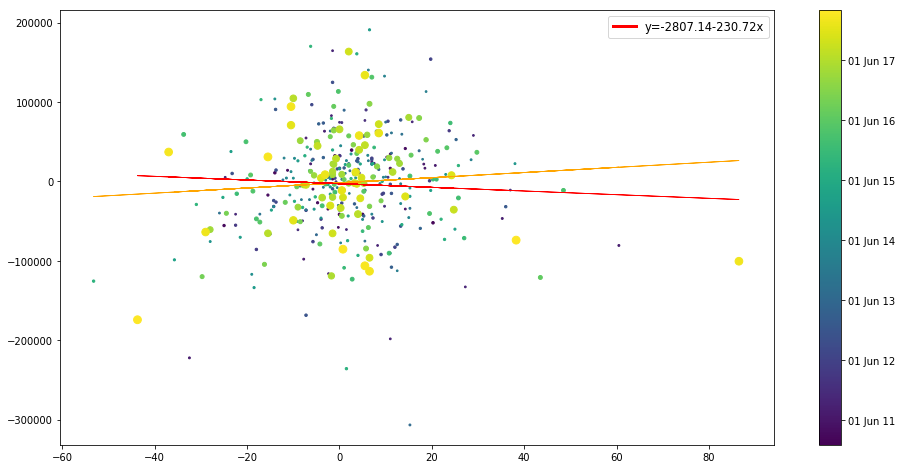

In [49]:
mult_lin_reg(dictionary_financials["E-MINI S&P 500 STOCK INDEX - CHICAGO MERCANTILE EXCHANGE"]\
             ["Change_in_Net_Positioning_Asset_Mgr"], df_diff['snp_futeres_price'], 0) 

In [50]:
mult_lin_reg(dictionary_financials["3-MONTH EURODOLLARS - CHICAGO MERCANTILE EXCHANGE"]\
             ["Net_Positioning_Asset_Mgr"], fed_funds_rate, 4, unempl_rate, 4) 
# actual net position: -2465837 (out of sample)
# higher R^2 does not garantee more accurate prediction  

[ 1.    1.51  4.1 ]
[-2655113.42801377]
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.711
Model:                            OLS   Adj. R-squared:                  0.709
Method:                 Least Squares   F-statistic:                     457.1
Date:                Tue, 08 May 2018   Prob (F-statistic):          6.17e-101
Time:                        00:40:30   Log-Likelihood:                -5653.1
No. Observations:                 375   AIC:                         1.131e+04
Df Residuals:                     372   BIC:                         1.132e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -

,Net_Positioning_Asset_Mgr,FEDFUNDS,UNRATE
Net_Positioning_Asset_Mgr,1.000000,-0.705931,0.814032
FEDFUNDS,-0.705931,1.000000,-0.666229
UNRATE,0.814032,-0.666229,1.000000


In [51]:
mult_lin_reg(dictionary_financials["BRITISH POUND STERLING - CHICAGO MERCANTILE EXCHANGE"]\
             ["Net_Positioning_Asset_Mgr"], doll2euro, 2, fed_funds_rate, 4, inflation_exp, 1)
# actual net position: -33236 (out of sample)

[ 1.     1.241  1.51   2.08 ]
[-42587.99747792]
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.638
Model:                            OLS   Adj. R-squared:                  0.635
Method:                 Least Squares   F-statistic:                     217.5
Date:                Tue, 08 May 2018   Prob (F-statistic):           2.17e-81
Time:                        00:40:30   Log-Likelihood:                -4136.5
No. Observations:                 375   AIC:                             8281.
Df Residuals:                     371   BIC:                             8297.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
cons

,Net_Positioning_Asset_Mgr,US/EuroFX,FEDFUNDS,Inflation
Net_Positioning_Asset_Mgr,1.000000,0.763591,-0.400502,0.724289
US/EuroFX,0.763591,1.000000,-0.455988,0.765377
FEDFUNDS,-0.400502,-0.455988,1.000000,-0.281291
Inflation,0.724289,0.765377,-0.281291,1.000000


[ 1.      2.7753]
[ 59152.90667069]
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     3.892
Date:                Tue, 08 May 2018   Prob (F-statistic):             0.0492
Time:                        00:40:30   Log-Likelihood:                -5240.2
No. Observations:                 378   AIC:                         1.048e+04
Df Residuals:                     376   BIC:                         1.049e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -9.52

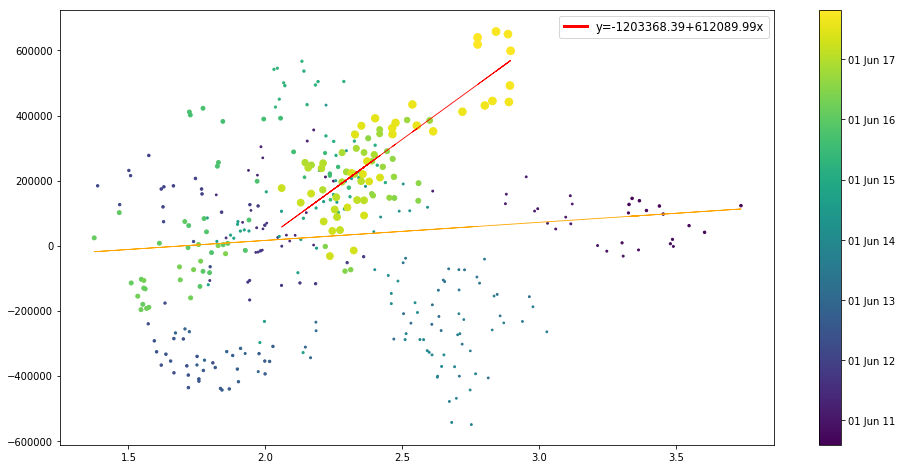

In [52]:
mult_lin_reg(dictionary_financials["10-YEAR U.S. TREASURY NOTES - CHICAGO BOARD OF TRADE"]\
             ["Net_Positioning_Asset_Mgr"], df['ten_years_us_yield'], 1) 
# 753567

In [53]:
# from scipy.stats.stats import pearsonr

# fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(12,9))
# #axes[0].title.set_size(55)

# dictionary_financials['10-YEAR U.S. TREASURY NOTES - CHICAGO BOARD OF TRADE']\
#     ["Net_Positioning_Lev_Money"].plot(ax=axes[0], legend=True, xticks=[], title="10-years T-notes")
# dictionary_financials['5-YEAR U.S. TREASURY NOTES - CHICAGO BOARD OF TRADE']\
#     ["Net_Positioning_Lev_Money"].plot(ax=axes[1], legend=True, xticks=[], title="5-years T-notes")
# dictionary_financials['2-YEAR U.S. TREASURY NOTES - CHICAGO BOARD OF TRADE']\
#     ["Net_Positioning_Lev_Money"].plot(ax=axes[2], legend=True, xticks=[], title="2-years T-notes")
# fed_funds_rate.plot(ax=axes[3], title="Fed Funds", legend=False)
# plt.tight_layout()
# #print(pearsonr(y, fed_funds_rate.values.reshape(-1)))

# print(pearsonr(dictionary_financials['10-YEAR U.S. TREASURY NOTES - CHICAGO BOARD OF TRADE']\
#     ["Net_Positioning_Lev_Money"], fed_funds_rate.values.reshape(-1)))
# print(pearsonr(dictionary_financials['5-YEAR U.S. TREASURY NOTES - CHICAGO BOARD OF TRADE']\
#     ["Net_Positioning_Lev_Money"], fed_funds_rate.values.reshape(-1)))
# print(pearsonr(dictionary_financials['2-YEAR U.S. TREASURY NOTES - CHICAGO BOARD OF TRADE']\
#     ["Net_Positioning_Lev_Money"], fed_funds_rate.values.reshape(-1)))

# ARIMA

In [54]:
def ts_diagnistic(series, lag, title=''):
    # idea for this function was taken from:
    # http://dacatay.com/data-science/part-3-time-series-stationarity-python/
    # plot ts, rolling mean and std
    # plot acf and pacf
    # test for stationarity: plot QQ, histogram, perform Augmented Dickey-Fuller unit root test
    
    
    from statsmodels.tsa.stattools import adfuller
    import statsmodels.api as sm
    import statsmodels.formula.api as smf
    import statsmodels.tsa.api as smt
    
    
    plt.rc('figure',figsize=(14,14))
    dim = (3, 2)
    ax_ts = plt.subplot2grid(dim, (0, 0), colspan=2)
    ax_acf = plt.subplot2grid(dim, (1, 0))
    ax_pacf = plt.subplot2grid(dim, (1, 1))
    ax_qq = plt.subplot2grid(dim, (2, 0))
    ax_hist = plt.subplot2grid(dim, (2, 1))
    
    # window = 12 : 1 quater 
    roll_mean = series.rolling(window=12).mean(); roll_std = series.rolling(window=12).std()
    
    # plot series
    ax_ts.plot(series)
    ax_ts.set_title(title, fontsize=14)
    #series.plot(ax=ax_ts, title=title, legend=True)
    ax_ts.plot(roll_mean, label="Rolling mean")
    ax_ts.plot(roll_std, label="Rolling std")
    ax_ts.legend(loc='best', fontsize=11)
    #plt.xlim(xmax=series.index[-1])
    ax_ts.set_xlim([series.index[0], series.index[-1]])

    
    # plot acf and pacf
    smt.graphics.plot_acf(series, lags=lag, ax=ax_acf, alpha=0.5)
    smt.graphics.plot_pacf(series, lags=lag, ax=ax_pacf, alpha=0.5) 
    
    # plot QQ
    sm.qqplot(series, line='s', ax=ax_qq)
    ax_qq.set_title('QQ Plot')
    
    # plot histogram
    series.plot(kind='hist', bins=25, ax=ax_hist)
    plt.title("Histogram of "+title)
    plt.tight_layout()
    
    plt.savefig("C:/Users/pc/Desktop/SG_project/Data/plots/"+title+".png", bbox_inches='tight', dpi=150)
    # perform Augmented Dickey-Fuller unit root test
    # null: the data is not stationary, alternative: stationary 
    test_stationarity = smt.adfuller(series, regression='c')
    df_test_stationarity = pd.Series(test_stationarity[:4],
                                  index=['test statistic', 'p-value', '# of lags', '# of observations'])
    print("Results of Augmented Dickey-Fuller unit root test:\n")
    for key, value in test_stationarity[4].items():
        df_test_stationarity['Critical Value (%s)'%key] = value
    print(df_test_stationarity)

Results of Augmented Dickey-Fuller unit root test:

test statistic         -9.833610e+00
p-value                 4.962031e-17
# of lags               5.000000e+00
# of observations       3.730000e+02
Critical Value (1%)    -3.448004e+00
Critical Value (5%)    -2.869320e+00
Critical Value (10%)   -2.570915e+00
dtype: float64


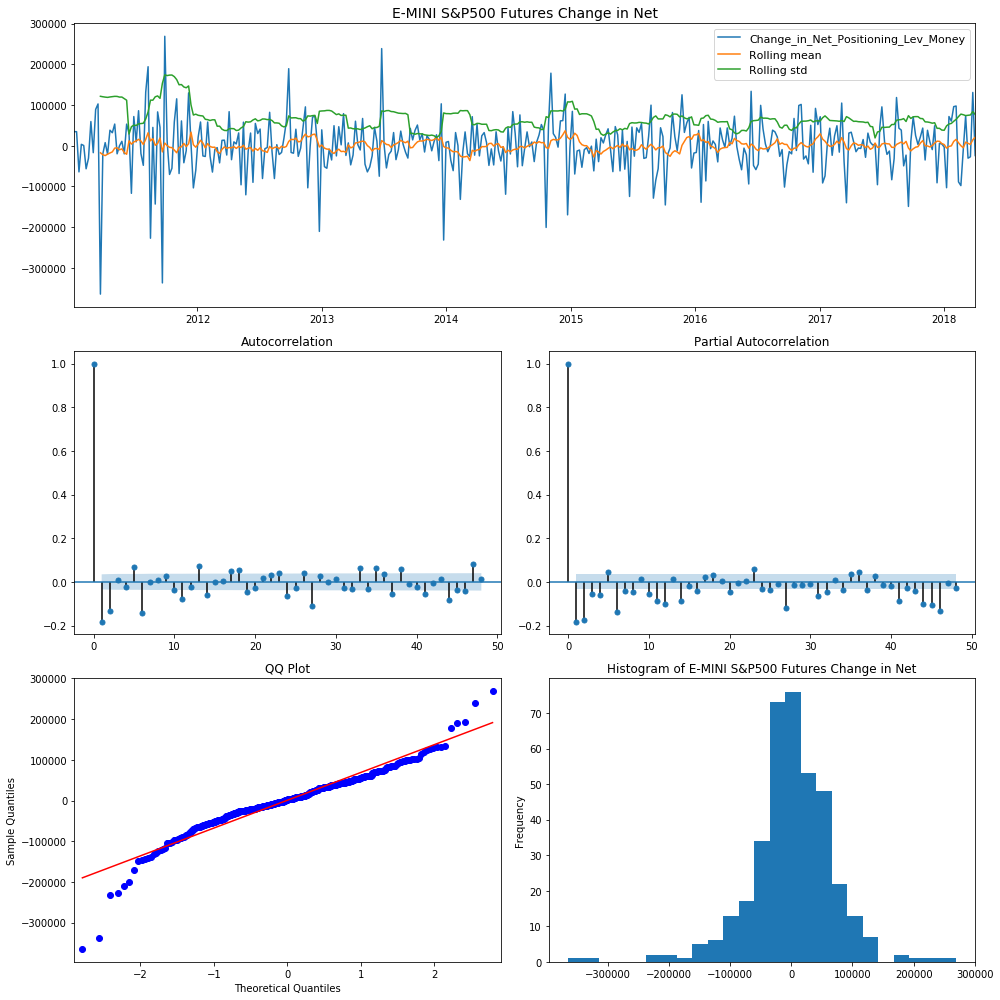

In [80]:
# reject the null -- stationary 
ts_diagnistic(dictionary_financials['E-MINI S&P 500 STOCK INDEX - CHICAGO MERCANTILE EXCHANGE']\
              ["Change_in_Net_Positioning_Lev_Money"], 48, "E-MINI S&P500 Futures Change in Net")

Results of Augmented Dickey-Fuller unit root test:

test statistic           -2.128477
p-value                   0.233219
# of lags                14.000000
# of observations       364.000000
Critical Value (1%)      -3.448443
Critical Value (5%)      -2.869513
Critical Value (10%)     -2.571018
dtype: float64


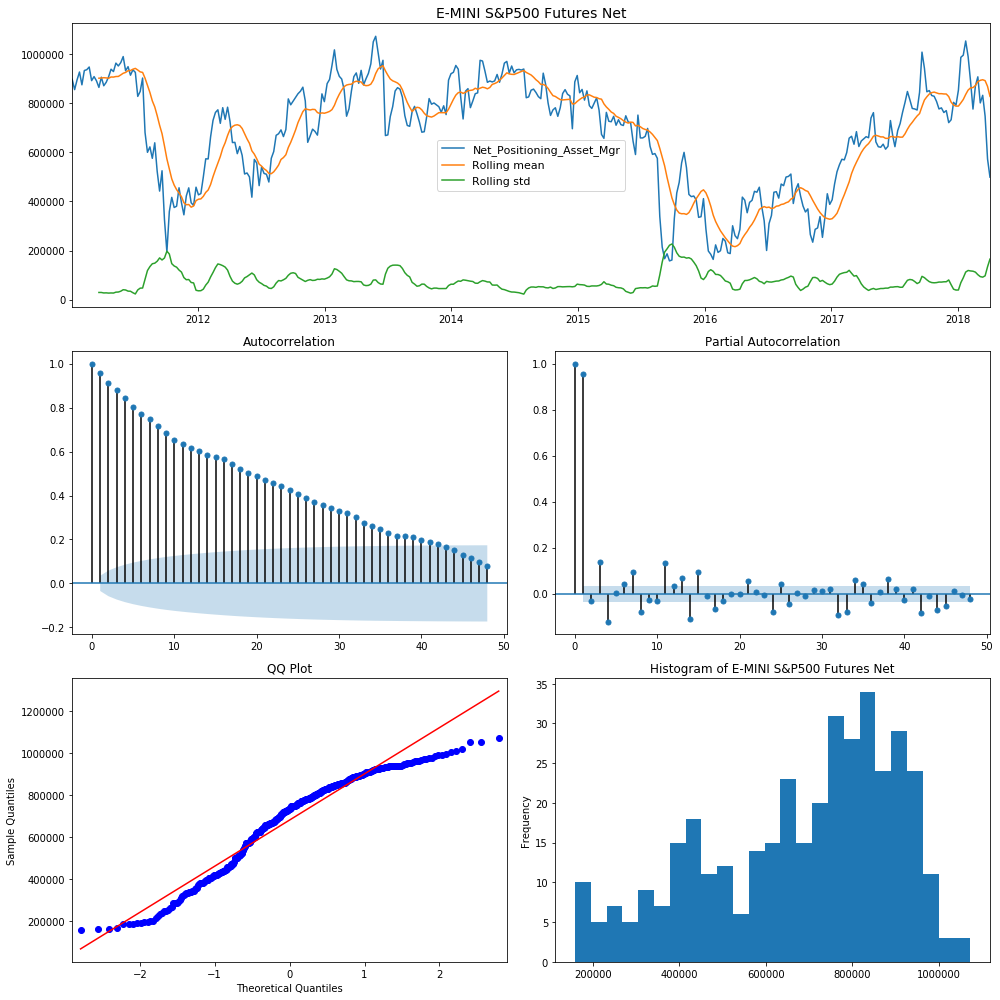

In [81]:
# do not reject the null -- non-stationary 
ts_diagnistic(dictionary_financials['E-MINI S&P 500 STOCK INDEX - CHICAGO MERCANTILE EXCHANGE']\
              ["Net_Positioning_Asset_Mgr"], 48, "E-MINI S&P500 Futures Net")

In [59]:
def perform_arima(series, p, d, q, title, pred_n=2):
    import statsmodels.api as sm
    series = series.dropna()
    n = len(series) - pred_n
    train_data = series.iloc[0:n]; test_data = series.iloc[n:]; train_plot_data = series.iloc[0:n+1]
    
    arima = sm.tsa.ARIMA(train_data, order=(p,d,q))
    model_results = arima.fit(disp=0)
    

    print(model_results.summary())
    #fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(14,8))
    
    plt.rc('figure',figsize=(14,10))
    plt.subplot(211)
    plt.xlim([series.index[0], series.index[-1]])
    plt.title(title, fontsize=15)
    plt.plot(train_plot_data, label='In-sample data', linestyle='-')
    plt.legend(loc='best')
    plt.plot(test_data, label='Held-out data', linestyle='--')
    plt.legend(loc='best')


    pred_index = series.index[n:]
    steps = len(pred_index)
    pred = model_results.forecast(steps=steps)
    
    # add first predicted value to the modeled data (so there is no gap in the plot)
    predict_plot_data = model_results.predict()
    predict_plot_data.loc[pred_index[0]] = pred[0][0]
    
    # confidence interval 
    conf_inter = pred[2].flatten()
    l = range(len(conf_inter))
    bottom = conf_inter[l[::2]]
    top = conf_inter[l[1::2]]
    
    plt.plot(predict_plot_data, label='Modeled data')
    plt.legend(loc='best')
    plt.plot(pred_index, pred[0], 'r', alpha=.6, label='Predicted values')
    plt.legend(loc='best')
    plt.fill_between(pred_index, bottom, top, color='k', alpha=.2)
    
    # zoom in 
    plt.subplot(212)
    plt.title(title, fontsize=15)
    range_ = 48 # one year 
    plt.xlim([series[-range_:].index[0], series.index[-1]])
    plt.plot(train_plot_data[-range_:], label='In-sample data', linestyle='-')
    plt.legend(loc='best')
    plt.plot(test_data, label='Held-out data', linestyle='--')
    plt.legend(loc='best')

    plt.plot(predict_plot_data[-range_:], label="Modeled data")
    plt.legend(loc='best')
    plt.plot(pred_index, pred[0], 'r', alpha=.6, label='Predicted values')
    plt.legend(loc='best')
    plt.fill_between(pred_index, bottom, top, color='k', alpha=.2)
    plt.tight_layout()
    plt.savefig("C:/Users/pc/Desktop/SG_project/Data/plots/"+title+".png", bbox_inches='tight', dpi=150)
    
    print((pred[0]-test_data)/test_data)

                                       ARMA Model Results                                      
Dep. Variable:     Change_in_Net_Positioning_Lev_Money   No. Observations:                  377
Model:                                      ARMA(1, 3)   Log Likelihood               -4710.901
Method:                                        css-mle   S.D. of innovations          64383.471
Date:                                 Tue, 08 May 2018   AIC                           9433.802
Time:                                         00:42:03   BIC                           9457.396
Sample:                                     01-04-2011   HQIC                          9443.167
                                          - 03-20-2018                                         
                                                coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
const       

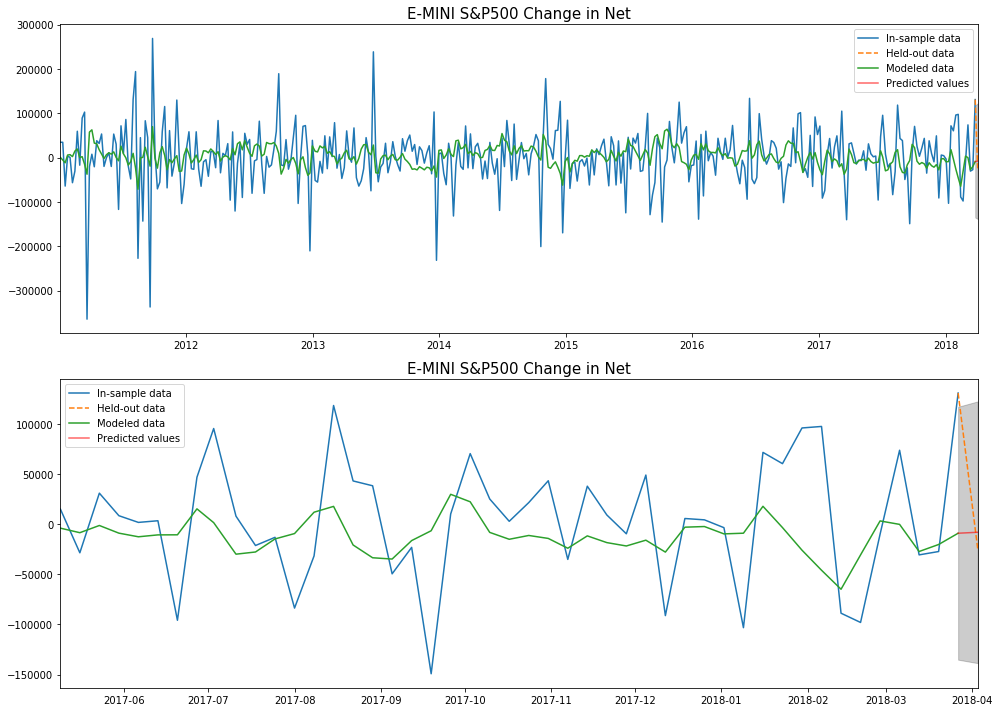

In [60]:
perform_arima(dictionary_financials['E-MINI S&P 500 STOCK INDEX - CHICAGO MERCANTILE EXCHANGE']\
              ["Change_in_Net_Positioning_Lev_Money"], 1, 0, 3, 'E-MINI S&P500 Change in Net', pred_n=2)